## Data aggregation

Goal: create 1 dataset with relevant synthesis parameters and measurement outcomes for everything I've made

Columns in output: UUID, volume fractions of everything, fit results processed with Null if version wasn't best

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

## Load synthesis files

In [4]:
synthesis_files = ['/home/bgpelkie/Code/silica-np-synthesis/2024_10_04_RandomBaseline_v2/Sample_table_2024_10_04_randomsampleV2.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_07_randomSampleV3/Sample_table_2024_10_07_randomsampleV3.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_17_RandomBaselineV4/Sample_table_2024_10_17_RandomBaselineV4.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_12_16_DistCompare_80nmTarget_round1/Sample_table_2024_12_16_CompareOpt_80nmTarget_Round1_apdist.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_12_16_DistCompare_80nmTarget_round1/Sample_table_2024_12_16_CompareOpt_80nmTarget_Round1_rmsedist.csv'] 

In [5]:
fp2name = {'/home/bgpelkie/Code/silica-np-synthesis/2024_10_07_randomSampleV3/Sample_table_2024_10_07_randomsampleV3.csv':'2024_10_07_randomSampleV3', 
           '/home/bgpelkie/Code/silica-np-synthesis/2024_10_04_RandomBaseline_v2/Sample_table_2024_10_04_randomsampleV2.csv':'2024_10_04_RandomBaseline_v2', 
           '/home/bgpelkie/Code/silica-np-synthesis/2024_10_17_RandomBaselineV4/Sample_table_2024_10_17_RandomBaselineV4.csv':'2024_10_17_RandomBaselineV4',
           '/home/bgpelkie/Code/silica-np-synthesis/2024_12_16_DistCompare_80nmTarget_round1/Sample_table_2024_12_16_CompareOpt_80nmTarget_Round1_apdist.csv':'2024_12_16_Optimize_APdist',
           '/home/bgpelkie/Code/silica-np-synthesis/2024_12_16_DistCompare_80nmTarget_round1/Sample_table_2024_12_16_CompareOpt_80nmTarget_Round1_rmsedist.csv':'2024_12_16_Optimize_rmse'
          }



## split apdist and rmse uuids

In [6]:
random_files = ['2024_10_07_randomSampleV3', '2024_10_04_RandomBaseline_v2', '2024_10_17_RandomBaselineV4']
apdist_files = ['2024_12_16_Optimize_APdist']
rmse_files = ['2024_12_16_Optimize_rmse']

In [7]:
synth_tables = []

random_uuids = []
apdist_uuids = []
rmse_uuids = []

count = 0
for fp in synthesis_files:
    data= pd.read_csv(fp)
    name = fp2name[fp]
    data['campaign'] = [name]*len(data)
    synth_tables.append(data)
    count += len(data)
    if name in random_files:
        random_uuids.extend(list(data['uuid']))
    if name in apdist_files:
        apdist_uuids.extend(list(data['uuid']))
    if name in rmse_files:
        rmse_uuids.extend(list(data['uuid']))
        
    

synth_table = pd.concat(synth_tables, axis = 0)

In [8]:
len(rmse_uuids)

20

In [9]:
synth_table

,Unnamed: 0,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,sample_dilute_vol,dilute_well
0,0,4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,A1,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
1,1,a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,A2,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
2,2,3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,A3,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
3,3,0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,A4,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
4,4,68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,A5,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,15,64c2103a-e77d-41f0-897a-a8d88888b562,17.000000,50.031143,255.000010,1377.968848,2.232143,2.691584,0.003261,C2,2024_12_16_Optimize_rmse,0.0,1700.0,E8
16,16,fd8bb27b-e747-4d87-b7d8-97fed17354db,17.000000,127.792399,255.000010,1300.207591,2.232143,2.691584,0.003241,C3,2024_12_16_Optimize_rmse,0.0,1700.0,F1
17,17,c91d4e20-59ba-49d7-8a04-c75213c5180e,80.374516,168.974425,191.328385,1259.322675,0.472120,12.725574,0.015320,C4,2024_12_16_Optimize_rmse,897.0,803.0,F2
18,18,f57690ca-b5f3-435c-8cfc-a059ddf2c88b,17.000000,186.999999,8.500000,1487.500002,2.232143,2.691584,0.003348,C5,2024_12_16_Optimize_rmse,0.0,1700.0,F3


In [10]:
synth_table = synth_table.drop(['Unnamed: 0'], axis = 1)
synth_table = synth_table.drop(['well', 'ethanol_dilute_vol', 'sample_dilute_vol'], axis = 1)

In [11]:
synth_table = synth_table.set_index('uuid')

In [12]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well
uuid,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN
...,...,...,...,...,...,...,...,...,...
64c2103a-e77d-41f0-897a-a8d88888b562,17.000000,50.031143,255.000010,1377.968848,2.232143,2.691584,0.003261,2024_12_16_Optimize_rmse,E8
fd8bb27b-e747-4d87-b7d8-97fed17354db,17.000000,127.792399,255.000010,1300.207591,2.232143,2.691584,0.003241,2024_12_16_Optimize_rmse,F1
c91d4e20-59ba-49d7-8a04-c75213c5180e,80.374516,168.974425,191.328385,1259.322675,0.472120,12.725574,0.015320,2024_12_16_Optimize_rmse,F2


## Get volume fractions

In [16]:
def target_vol(row):
    target_vol = row['teos_volume'] + row['ammonia_volume'] + row['water_volume'] + row['ethanol_volume']
    return target_vol
    

In [17]:
synth_table['target_volume'] = synth_table.apply(target_vol, axis=1)

In [18]:
synth_table['teos_vol_frac'] = synth_table['teos_volume']/synth_table['target_volume']
synth_table['ammonia_vol_frac'] = synth_table['ammonia_volume']/synth_table['target_volume']
synth_table['water_vol_frac'] = synth_table['water_volume']/synth_table['target_volume']
synth_table['ethanol_vol_frac'] = synth_table['ethanol_volume']/synth_table['target_volume']

In [19]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac
uuid,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.029542,0.073083,0.097024,0.800351
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.098180,0.062087,0.048724,0.791009
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.049105,0.033951,0.103001,0.813944
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.112022,0.061094,0.082243,0.744642
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.044250,0.100538,0.110330,0.744882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64c2103a-e77d-41f0-897a-a8d88888b562,17.000000,50.031143,255.000010,1377.968848,2.232143,2.691584,0.003261,2024_12_16_Optimize_rmse,E8,1700.0,0.010000,0.029430,0.150000,0.810570
fd8bb27b-e747-4d87-b7d8-97fed17354db,17.000000,127.792399,255.000010,1300.207591,2.232143,2.691584,0.003241,2024_12_16_Optimize_rmse,F1,1700.0,0.010000,0.075172,0.150000,0.764828
c91d4e20-59ba-49d7-8a04-c75213c5180e,80.374516,168.974425,191.328385,1259.322675,0.472120,12.725574,0.015320,2024_12_16_Optimize_rmse,F2,1700.0,0.047279,0.099397,0.112546,0.740778


In [20]:
#synth_table.to_csv('synth_table_master_11_11_24.csv')

## Load distance file

In [23]:
distance_results = pd.read_csv('distance_results_comparisonOptRound1_80nm.csv')

In [24]:
distance_results = distance_results.set_index('uuid')

In [25]:
distance_results

,Unnamed: 0,amplitude_distance,phase_distance,sum_ap_distance,raw_rmse_distance,sphere_diameter_nm,sphere_pdi,processes_status
uuid,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,0,0.746509,0.546916,1.293424,0.263329,73.262381,1.000000,success
a180d359-a229-4b3e-a615-2991fd549f42,1,0.801114,0.543067,1.344181,0.261322,100.922977,0.722970,success
3584700a-8b01-4e59-a53a-1300fd3fac0a,2,0.866996,0.549924,1.416920,0.258173,96.631829,0.704364,success
0e6edb88-77c3-4984-a38d-198341bba9e1,3,0.840929,0.578464,1.419393,0.271926,93.463489,0.718000,success
68831f53-4a51-4f12-b385-10c50c8fab46,4,0.985176,0.528511,1.513687,0.267274,94.828557,0.695253,success
...,...,...,...,...,...,...,...,...
67d341f0-6e24-4565-8491-b1e25915268e,116,1.415012,0.513451,1.928462,1.491658,12.476198,0.416236,success
a44315b0-0099-4630-a327-a22940b04fac,117,0.808644,0.437355,1.245999,0.318378,132.407588,0.158868,success
26057b89-b361-498c-a63b-0447de234580,118,1.021725,0.639348,1.661073,0.400853,86.163816,0.676496,success


In [26]:
distance_list = []
rmse_list = []
experiment_status = []

for uuid_val in synth_table.index:
    print(uuid_val)
    try:
        row = distance_results.loc[uuid_val]
    except KeyError:
        distance_list.append(None)
        rmse_list.append(None)
        experiment_status.append('incomplete')
        continue

    if row['processes_status'] == 'failed':
        distance_list.append(distance_results['sum_ap_distance'].max())
        rmse_list.append(distance_results['raw_rmse_distance'].max())
        experiment_status.append('complete')
    if row['processes_status'] == 'success':
        distance_list.append(row['sum_ap_distance'])
        rmse_list.append(row['raw_rmse_distance'])
        experiment_status.append('complete')
        


4bec4e18-80bb-44d9-8508-cc464f14b287
a180d359-a229-4b3e-a615-2991fd549f42
3584700a-8b01-4e59-a53a-1300fd3fac0a
0e6edb88-77c3-4984-a38d-198341bba9e1
68831f53-4a51-4f12-b385-10c50c8fab46
fed3ab35-04e9-4916-8527-8627191a3bdc
32ec16b1-c5b5-4d8b-b396-cd1ad4b740d9
a4d8a8f6-2654-490f-b14a-02d3fb1f94b2
770a433d-0480-4cee-bf12-ce066c24db55
41414be7-3e27-4b4d-b70e-e31d54a733d3
6b50a94f-b7f2-402e-a210-e89f507b8861
fa1dfc55-e5e0-4514-a66a-e29a5351518a
ef17f542-90a3-44a8-a6b8-acb920953fab
23850c30-c572-41ad-abf0-7e1bd4fa7397
4ab46dcc-3395-4e7b-bb87-52e805e12abb
657e707f-abc9-4f86-ae1e-9e59efb6e1f9
96ef6012-d812-4975-8b77-8ed7e78669fb
e0368e49-ecc3-4ebf-9a19-4e942c829517
d03dab18-5712-44f7-9334-14047212632e
4d5fd07b-987b-49df-b4ba-54d2a337d945
6abcfcc8-cf8d-4a5e-a92f-f3afd8023fbd
8559907a-1b27-4673-ae0e-602b83d86deb
b683d769-9cd7-454a-b546-4e86afe5e3f4
a6974af8-5b2d-431a-94df-d35c0be3ee54
81f8f6c2-0e42-4680-bc11-c0be02bfd641
f5e32498-0689-4e74-9a45-9c17edf776b9
1c809d50-4605-4865-aa13-13649203ede8
f

In [27]:
synth_table['ap_distance'] = distance_list
synth_table['rmse_distance'] = rmse_list
synth_table['experiment_status'] = experiment_status

In [28]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.029542,0.073083,0.097024,0.800351,1.293424,0.263329,complete
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.098180,0.062087,0.048724,0.791009,1.344181,0.261322,complete
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.049105,0.033951,0.103001,0.813944,1.416920,0.258173,complete
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.112022,0.061094,0.082243,0.744642,1.419393,0.271926,complete
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.044250,0.100538,0.110330,0.744882,1.513687,0.267274,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64c2103a-e77d-41f0-897a-a8d88888b562,17.000000,50.031143,255.000010,1377.968848,2.232143,2.691584,0.003261,2024_12_16_Optimize_rmse,E8,1700.0,0.010000,0.029430,0.150000,0.810570,0.775454,0.333036,complete
fd8bb27b-e747-4d87-b7d8-97fed17354db,17.000000,127.792399,255.000010,1300.207591,2.232143,2.691584,0.003241,2024_12_16_Optimize_rmse,F1,1700.0,0.010000,0.075172,0.150000,0.764828,1.425669,0.311552,complete
c91d4e20-59ba-49d7-8a04-c75213c5180e,80.374516,168.974425,191.328385,1259.322675,0.472120,12.725574,0.015320,2024_12_16_Optimize_rmse,F2,1700.0,0.047279,0.099397,0.112546,0.740778,1.478737,0.269247,complete


## Split out RMSE and APDist results

In [29]:
apdist_samples = random_uuids.copy()
apdist_samples.extend(apdist_uuids)

rmse_samples = random_uuids.copy()
rmse_samples.extend(rmse_uuids)

In [30]:
len(rmse_samples)

120

In [31]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.029542,0.073083,0.097024,0.800351,1.293424,0.263329,complete
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.098180,0.062087,0.048724,0.791009,1.344181,0.261322,complete
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.049105,0.033951,0.103001,0.813944,1.416920,0.258173,complete
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.112022,0.061094,0.082243,0.744642,1.419393,0.271926,complete
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.044250,0.100538,0.110330,0.744882,1.513687,0.267274,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64c2103a-e77d-41f0-897a-a8d88888b562,17.000000,50.031143,255.000010,1377.968848,2.232143,2.691584,0.003261,2024_12_16_Optimize_rmse,E8,1700.0,0.010000,0.029430,0.150000,0.810570,0.775454,0.333036,complete
fd8bb27b-e747-4d87-b7d8-97fed17354db,17.000000,127.792399,255.000010,1300.207591,2.232143,2.691584,0.003241,2024_12_16_Optimize_rmse,F1,1700.0,0.010000,0.075172,0.150000,0.764828,1.425669,0.311552,complete
c91d4e20-59ba-49d7-8a04-c75213c5180e,80.374516,168.974425,191.328385,1259.322675,0.472120,12.725574,0.015320,2024_12_16_Optimize_rmse,F2,1700.0,0.047279,0.099397,0.112546,0.740778,1.478737,0.269247,complete


In [32]:
rmse_samples

['4bec4e18-80bb-44d9-8508-cc464f14b287',
 'a180d359-a229-4b3e-a615-2991fd549f42',
 '3584700a-8b01-4e59-a53a-1300fd3fac0a',
 '0e6edb88-77c3-4984-a38d-198341bba9e1',
 '68831f53-4a51-4f12-b385-10c50c8fab46',
 'fed3ab35-04e9-4916-8527-8627191a3bdc',
 '32ec16b1-c5b5-4d8b-b396-cd1ad4b740d9',
 'a4d8a8f6-2654-490f-b14a-02d3fb1f94b2',
 '770a433d-0480-4cee-bf12-ce066c24db55',
 '41414be7-3e27-4b4d-b70e-e31d54a733d3',
 '6b50a94f-b7f2-402e-a210-e89f507b8861',
 'fa1dfc55-e5e0-4514-a66a-e29a5351518a',
 'ef17f542-90a3-44a8-a6b8-acb920953fab',
 '23850c30-c572-41ad-abf0-7e1bd4fa7397',
 '4ab46dcc-3395-4e7b-bb87-52e805e12abb',
 '657e707f-abc9-4f86-ae1e-9e59efb6e1f9',
 '96ef6012-d812-4975-8b77-8ed7e78669fb',
 'e0368e49-ecc3-4ebf-9a19-4e942c829517',
 'd03dab18-5712-44f7-9334-14047212632e',
 '4d5fd07b-987b-49df-b4ba-54d2a337d945',
 '6abcfcc8-cf8d-4a5e-a92f-f3afd8023fbd',
 '8559907a-1b27-4673-ae0e-602b83d86deb',
 'b683d769-9cd7-454a-b546-4e86afe5e3f4',
 'a6974af8-5b2d-431a-94df-d35c0be3ee54',
 '81f8f6c2-0e42-

In [33]:
'0ec1c475-cfcb-4825-99d1-8aa99d749a94' == '0ec1c475-cfcb-4825-99d1-8aa99d749a94'

True

In [34]:
synth_table_apdist = synth_table.loc[apdist_samples]
synth_table_rmse = synth_table.loc[rmse_samples]

In [35]:
synth_table_apdist = synth_table_apdist[synth_table_apdist['experiment_status'] == 'complete'].copy()
synth_table_rmse = synth_table_rmse[synth_table_rmse['experiment_status'] == 'complete'].copy()

In [36]:
synth_table_apdist['rank'] = synth_table_apdist['ap_distance'].rank()
synth_table_rmse['rank'] = synth_table_rmse['ap_distance'].rank()

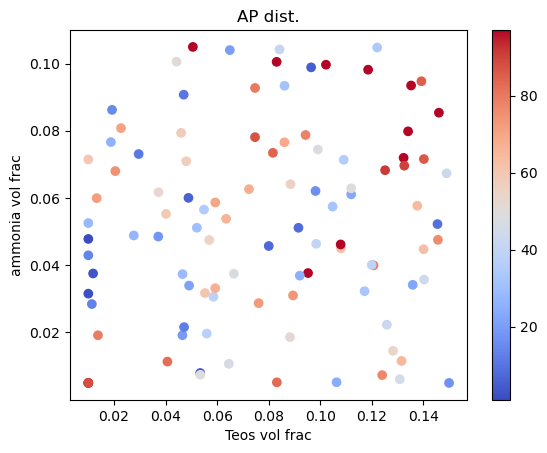

In [37]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table_apdist['teos_vol_frac'], synth_table_apdist['ammonia_vol_frac'], c = synth_table_apdist['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
ax.set_title('AP dist.')
cbar = fig.colorbar(sc, ax = ax)

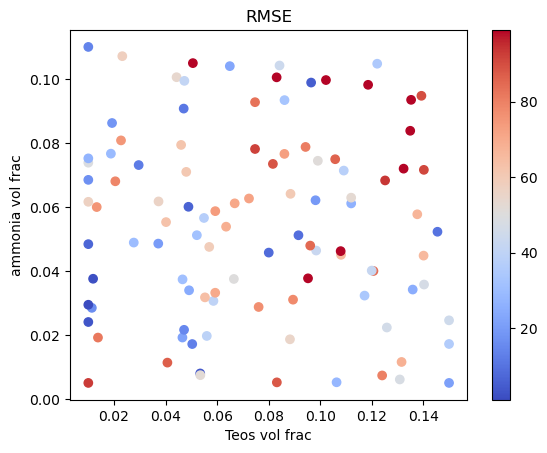

In [38]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table_rmse['teos_vol_frac'], synth_table_rmse['ammonia_vol_frac'], c = synth_table_rmse['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
ax.set_title('RMSE')
cbar = fig.colorbar(sc, ax = ax)

In [39]:

name_bounds_apdist = {}
for name in fp2name.values():
    name_bounds_apdist[name] = []
    count = 0
    for i, row in synth_table_apdist.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_bounds_apdist[name].append(count)
        count += 1
        

In [40]:
best_distances = []
for i, row in synth_table_apdist.iterrows():
    dist = row['ap_distance']
    if len(best_distances) == 0:
        best_distances.append(dist)
    else:
        best_distances.append(min(best_distances[-1], dist))

/home/bgpelkie/miniconda3/envs/sas/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bgpelkie/miniconda3/envs/sas/lib/python3.12/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


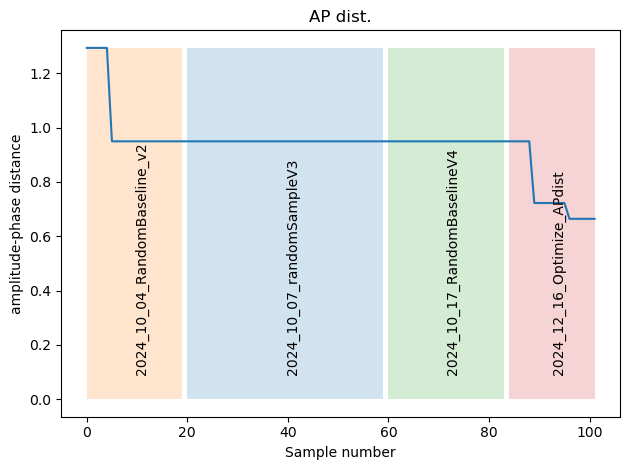

In [41]:
fig, ax = plt.subplots()

for name, bounds in name_bounds_apdist.items():
    ax.fill_between(bounds, 0, max(best_distances), alpha = 0.2)
    ax.text(np.mean(bounds), 0.1, name, rotation = 'vertical')
ax.plot(best_distances)


ax.set_xlabel('Sample number')
ax.set_ylabel('amplitude-phase distance')
ax.set_title('AP dist.')

plt.tight_layout()
#plt.savefig('Campaign_convergence_plot.png', dpi = 300)

In [49]:
best_distances

[1.293424352484601,
 1.293424352484601,
 1.293424352484601,
 1.293424352484601,
 1.293424352484601,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.9493864264693564,
 0.949386426469356

In [42]:
# rmse
name_bounds_rmse = {}
for name in fp2name.values():
    name_bounds_rmse[name] = []
    count = 0
    for i, row in synth_table_rmse.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_bounds_rmse[name].append(count)
        count += 1

In [43]:
best_distances = []
for i, row in synth_table_rmse.iterrows():
    dist = row['ap_distance']
    if len(best_distances) == 0:
        best_distances.append(dist)
    else:
        best_distances.append(min(best_distances[-1], dist))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


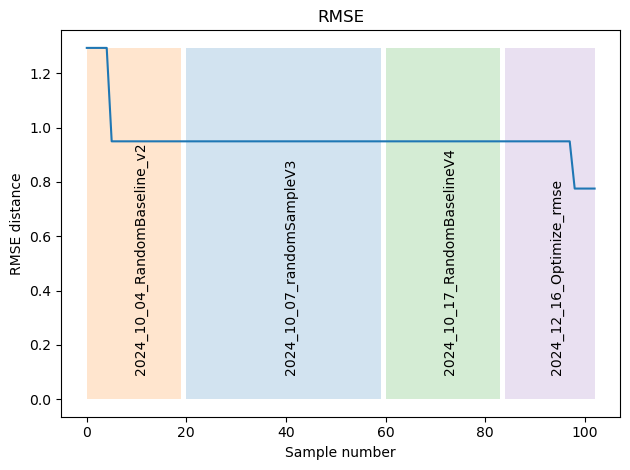

In [44]:
fig, ax = plt.subplots()

for name, bounds in name_bounds_rmse.items():
    ax.fill_between(bounds, 0, max(best_distances), alpha = 0.2)
    ax.text(np.mean(bounds), 0.1, name, rotation = 'vertical')
ax.plot(best_distances)


ax.set_xlabel('Sample number')
ax.set_ylabel('RMSE distance')
ax.set_title('RMSE')

plt.tight_layout()
#plt.savefig('Campaign_convergence_plot.png', dpi = 300)

In [ ]:
b

In [53]:
synth_table_rmse[synth_table_rmse['rmse_distance'] == synth_table_rmse['rmse_distance'].min()]

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status,rank
uuid,,,,,,,,,,,,,,,,,,
96ef6012-d812-4975-8b77-8ed7e78669fb,231.030318,58.108501,21.690574,1389.170607,0.078839,36.578677,0.044865,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.1359,0.034181,0.012759,0.817159,1.418349,0.227698,complete,25.0


In [52]:
synth_table_rmse

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status,rank
uuid,,,,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.029542,0.073083,0.097024,0.800351,1.293424,0.263329,complete,12.0
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.098180,0.062087,0.048724,0.791009,1.344181,0.261322,complete,19.0
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.049105,0.033951,0.103001,0.813944,1.416920,0.258173,complete,24.0
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.112022,0.061094,0.082243,0.744642,1.419393,0.271926,complete,26.0
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.044250,0.100538,0.110330,0.744882,1.513687,0.267274,complete,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64c2103a-e77d-41f0-897a-a8d88888b562,17.000000,50.031143,255.000010,1377.968848,2.232143,2.691584,0.003261,2024_12_16_Optimize_rmse,E8,1700.0,0.010000,0.029430,0.150000,0.810570,0.775454,0.333036,complete,1.0
fd8bb27b-e747-4d87-b7d8-97fed17354db,17.000000,127.792399,255.000010,1300.207591,2.232143,2.691584,0.003241,2024_12_16_Optimize_rmse,F1,1700.0,0.010000,0.075172,0.150000,0.764828,1.425669,0.311552,complete,27.0
c91d4e20-59ba-49d7-8a04-c75213c5180e,80.374516,168.974425,191.328385,1259.322675,0.472120,12.725574,0.015320,2024_12_16_Optimize_rmse,F2,1700.0,0.047279,0.099397,0.112546,0.740778,1.478737,0.269247,complete,41.0


In [46]:
## best for campaign plot

name_distances_apdist = {}
for name in fp2name.values():
    count = 0
    for i, row in synth_table_apdist.iterrows():
        bounds = []
        if row['campaign'] == name:
            try:
               name_distances_apdist[name].append(row['ap_distance'])
            except KeyError:
                name_distances_apdist[name] = [row['ap_distance']]
        count += 1

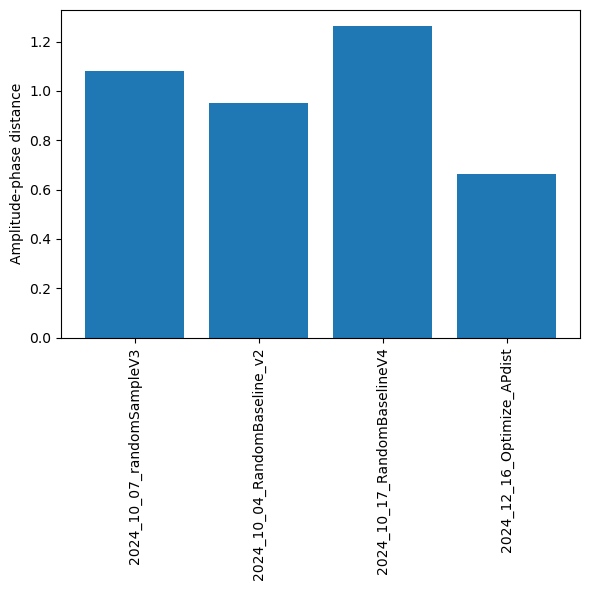

In [47]:
fig, ax = plt.subplots(figsize = (6,6))
name_distances_max = [min(distances) for distances in name_distances_apdist.values()]
ax.bar(name_distances_apdist.keys(), name_distances_max)
ax.tick_params(axis = 'x', rotation = 90)
ax.set_ylabel('Amplitude-phase distance')

plt.tight_layout()

plt.savefig('best_per_campaign.png', dpi = 300)

In [48]:
synth_table_apdist.to_csv('synth_table_12_16_24_apdist.csv')
synth_table_rmse.to_csv('synth_table_12_16_24_rmse.csv')